## <span style = "color:black">**Problem Setting**

\begin{aligned}
&\text{Given}\,x_1,x_2,...,x_N\ \text{which are realizations of a random sample }X_1,X_2,\dots,X_N \\
&\text{where,}\, X_1 \sim f_1(x_1;\theta),X_2 \sim f_2(x_1;\theta),\dots,X_N \sim f_N(x_N;\theta) \\ \\

&\text{Goal : 확률분포의 모수 $\theta$를 점추정하기}
\end{aligned}

## <span style = "color : black"> **What is estimation?** </span>

Text(0, 0.5, 'y')

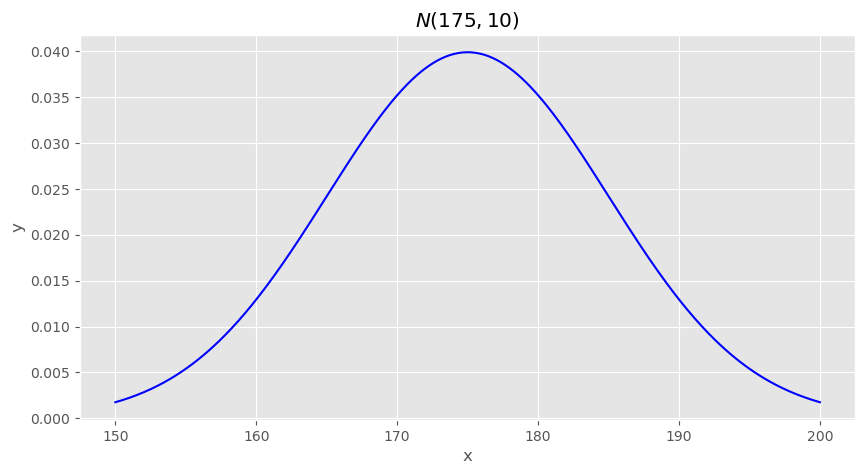

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

plt.figure(figsize=(10,5))
rv = sp.stats.norm(175,10)
x = np.linspace(150,200,500)
plt.plot(x,rv.pdf(x),"b")
plt.title("$N(175,10)$")
plt.xlabel("x")
plt.ylabel("y")

대한민국 20대 남성들의 키가 다음과 확률분포를 따른다고 가정해보겠습니다. 우리는 "키가 175근처인 사람이 대부분이네??" 또는 "키가 160이하이거나 190이상인 사람은 거의 없겠네?" 등의 해석을 할 수 있습니다. 이러한 해석을 가능하게 하는것은 우리가 확률분포의 모양(정규분포)과 모수(평균,분산)을 가정했기 때문입니다. 극단적으로,같은 평균이라는 모수를 가지지만 전혀다른 분포인 베르누이분포라고 가정을 하면 확률변수의 값이 딱 떨어지는 2개의 이산적인 값만을 가지므로 "이하"라는 표현이나 "이상"이라는 표현은 쓸 수 없습니다.(물론 베르누이분포는 분산은 모수가 아니긴합니다.) 모양이 같지만 모수가 다른 경우도 마찬가지입니다. 같은 정규분포라도 평균이나 분산이 다르면 전혀 다른 해석이 가능합니다.<br>

만약 위와 같은 해석을 하고싶으나 20대 남성들의 키가 따르는 분포자체를 모른다면 해야할까요? 위와 같은 해석을 하기위해서는 확률분포 더 상세히말하자면 확률분포의 모양과 확률분포의 모수를 알아야 합니다. 이를 확률분포의 추정이라고 합니다.<br>

확률분포의 추정에서 보통 분포의 모양은 어떠한 분포로 가정합니다(ex 정규분포,베타분포,베르누이분포,다항분포 등등...). 그 다음은 확률분포의 모수를 추정해야 합니다. 이때 모수를 추정하는 방법 중 하나가 바로 최대가능도 추정법(Maximum likelihood estimation)입니다.<br>

아까전 상황을 다시 생각해봅시다. 우리는 확률분포로부터 몇 가지의 해석을 할 수 있었습니다. 이는 확률분포의 모양과 모수(평균,분산)를 먼저 가정을 했기 때문이었고,이로부터 특정한 표본이 나올 수 있는 가능성을 알 수 있었습니다.이와는 반대로,최대가능도 추정법에서는 역으로 샘플이 주어져있다고 가정하고 가정한 확률분포의 모양에 대해서 가장 가능성이 높은 모수를 이 모수를 모수에 대한 추정량(estimated value)로 합니다.

## <span style = "color : black">**MLE(최대가능도 추정법)**

## <span style = "color : black">**Likelyhood function** </span>

위에서 **샘플이 주어져있다고 가정하고 가장 가능성이 높은 모수**가 모수에 대한 추정량이라고 했습니다. 그렇다면 가능성이 가장 높은 모수를 정하기 위해서 **모수의 가능성**이라는 지표를 정의할 필요가 있습니다. 모수의 가능성은 어떻게 정의해야 할까요?

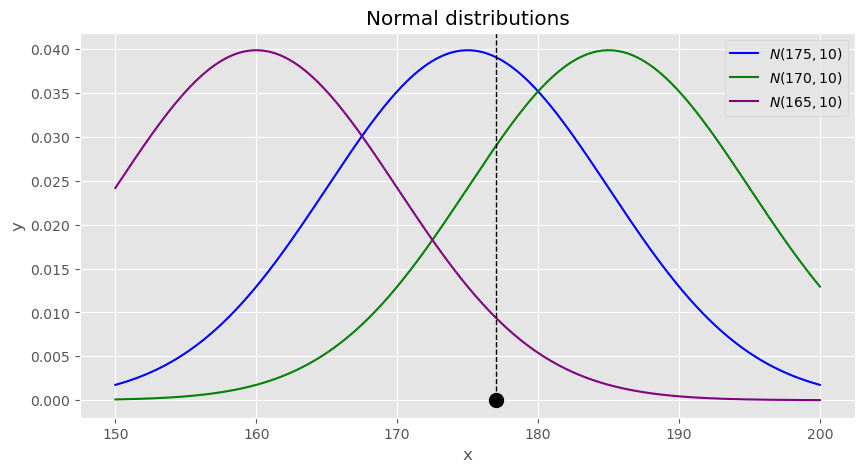

In [2]:
rv1 = sp.stats.norm(175,10)
rv2 = sp.stats.norm(185,10)
rv3 = sp.stats.norm(160,10)
x = np.linspace(150,200,500)
plt.figure(figsize=(10,5))
plt.plot(x,rv1.pdf(x),"b")
plt.plot(x,rv2.pdf(x),"g")
plt.plot(x,rv3.pdf(x),"purple")
plt.plot([177],[0],"o",color="black",ms="10")
plt.plot 
plt.axvline(177,color = "black",linewidth = 1,linestyle = "--",ymin=0.07)
plt.title("Normal distributions")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["$N(175,10)$","$N(170,10)$","$N(165,10)$"],loc="upper right")

그림과 같이 크기가1인 표본을 177 얻었고 확률분포의 모양은 정규분포로 가정했다고 해봅시다. 샘플이 주어져 있을때 가능성이 가장 높은 모수는 무엇일까요? 그래프를 들여다보니 보라색 확률분포에서는 뭔가 표본을 얻기는 힘들 것 같습니다. 표본을 뽑을 확률(엄밀히는 확률밀도이지만 확률로 적겠습니다.)이 너무 낮아서 가능성이 너무 낮기 때문입니다. 초록색의 경우는 보라색보다는 확률이 더 크기때문에 가능성이 더 커보입니다. 파랑색의 경우는 확률이 초록색보다도 더 큽니다. 그러므로 3개의 분포중에서는 파랑색 확률분포의 모수인 175가 가능성이 가장 커보이고 이를 실제 모수에 대한 추정값으로 하는 것이 합리적입니다.<br>

위의 예시에서 가능성을 확인하기 위해서 확률분포의 값(y축,확률,확률밀도)을 확인했습니다.결국 우리가 정의하기로 지표인 **모수의 가능성**은 결국은 **확률(또는 확률밀도)** 그 자체임을 알 수 있습니다. 그러나 확률과는 약간 다르게 확률(또는 확률밀도)은 모수를 가정하고 확률분포의 값을 읽는 반면 **모수의 가능성**은 샘플을 가정하고 모수를 바꿔가며 서로다른 확률분포에서 값을 파악함에 차이가 있습니다. 모수의 가능성에는 **가능도(likelyhood)**라는 이름을 붙여줍니다. 

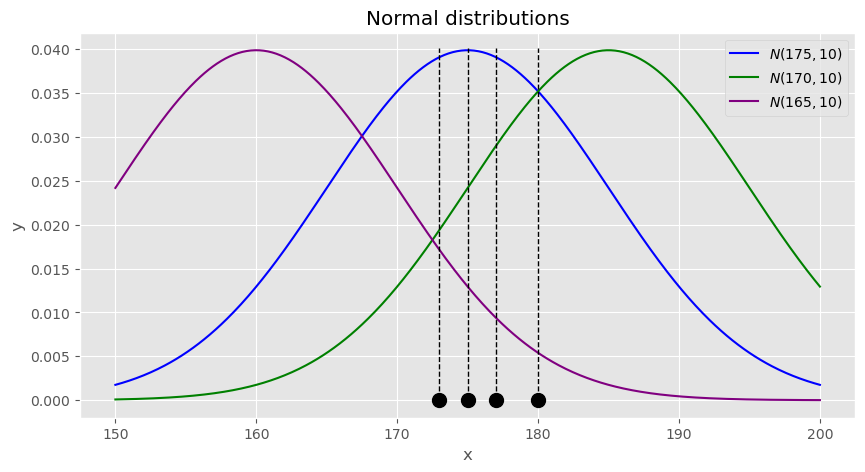

In [3]:
rv1 = sp.stats.norm(175,10)
rv2 = sp.stats.norm(185,10)
rv3 = sp.stats.norm(160,10)
x = np.linspace(150,200,500)
plt.figure(figsize=(10,5))
plt.plot(x,rv1.pdf(x),"b")
plt.plot(x,rv2.pdf(x),"g")
plt.plot(x,rv3.pdf(x),"purple")
s = [173,177,175,180]
plt.plot(s,[0,0,0,0],"o",color="black",ms="10")
for i in s:
    temp = [i]
    plt.axvline(temp,linestyle = "--",color="black",linewidth=1,ymin=0.07,ymax = 0.96)
plt.title("Normal distributions")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["$N(175,10)$","$N(170,10)$","$N(165,10)$"],loc="upper right")

이번에는 크기가 4인 표본을 얻었다고 해봅시다. 분포의 모양은 마찬가지로 정규분포로 가정했습니다. 이번에는 샘플의 크기가4이므로 이전과는 다르게 하나의 데이터포인트만 반영하는 것이 아니라 4개의 데이터포인트를 모두 반영하여 가능성이 가장 높은 모수를 고려해야 합니다. <br>

위에서 1개의 데이터포인트(표본)를 고려할때에는 여러가지 모수를 따르는 분포에서 1개의 확률값만 읽고 어떤 모수가 가능성이 가장 높은지 확인하고 가능도라는 것을 정의했습니다. 4개일때도 다르지 않습니다. 4개일때에도 확률값을 읽는데 다만 달라진 것은 4개의 확률값을 동시에 함께 반영해야 한다는 점입니다. 4개일 경우에는 4개의 표본 모두에 대하여 동시에 함께 그 가능성을 고려해야 합니다. 그러므로 여기서는 가능도인 확률을 각각의 데이터포인트를 뽑을 동시에 함께 뽑을 확률이자 확률의 곱인 확률인 결합확률(joint distribution)로 계산해야 합니다.

<span style = "font-size:15pt">**정리**</span><br>
모수의 가능도는 샘플과 확률분포의 모양이 주어져있을 때,어떤 모수가 주어진 **샘플을 취할 가능성**을 의미하며 이는 곧 **(결합)확률** 입니다. 다만 확률(또는 확률분포)의 경우에는 목적이 모수가 정해진 확률분포로부터 읽는 그 값을 읽어 어떤 샘플 x값을 취할 가능성을 파악하는 것이고 반면 가능도는 샘플이 이미 뽑혀서 정해져있을때, 서로다른 모수를 가지는 확률분포의 값을 읽어서 어떤 모수가 가장 가능성이 높은지 파악하는 것입니다. 수학적으로 표기하면 다음과 같습니다.<br>

\begin{align}
L(\theta|D) = L(\theta|x_1,x_2,\dots,x_N) &= f_{X_1,X_2,\dots,X_N}(x_1,x_2,\dots,x_N;\theta) \\
&= \prod_{i=1}^{N}f_{X_i}(x_i;\theta)
\end{align}

식(1)은 가능도 = 결합확률임을 의미합니다. 식(2)는 확률변수가 독립일 경우의 결합확률 = 확률의 곱입니다. 각각의 샘플에 대한 확률변수는 모두 독립이라고 가정합니다.

## <span style = "color : black">**Likelyhood의 최댓값 구하기** </span>

여기까지 가능도함수를 구하는 방법을 알아봤습니다. 가능도함수를 최대화 할때의 값이 주어진 샘플에 대해서 가장 가능성이 높은 확률분포의 모수이므로 그때의 값으로 모수를 추정합니다. MLE추정량은 다음과 같습니다.<br>

\begin{aligned}
\hat{\theta}_{MLE} &= \underset{\theta}{\text{argmax}}\,L(\theta|x_1,x_2 \dots x_n) \\
&=  \underset{\theta}{\text{argmax}},f_{X_1,X_2,\dots,X_n}(x_1,x_2,\dots,x_n|\theta) \\
&= \underset{\theta}{\text{argmax}}\,\prod_{i=1}^{N}f_{X_i}(x_i;\theta)
\end{aligned}
<br>

## <span style = "color : black">**베이즈 정리에 의한 MLE**

$D=(t_1,t_2,\dots,t_n)$는 샘플(데이터셋), $\theta$는 우리가 알고싶은 확률분포의 모수라고 합시다. 베이즈정리는 증거 또는 조건이 주어지기 전의 사전확률 $p(D)$와 주어진 후의 사후확률 $p(\theta|D)$사이의 관계를 알려줍니다.

\begin{aligned}
p(\theta|D) = \frac{p(D|\theta)p(\theta)}{p(D)} \propto p(\theta|D) \times p(\theta)
\end{aligned}

여기서 사후확률은 $\theta$에 대한 확률분포로 데이터(샘플)이 주어질때 확률분포의 임의의 모수$\theta$가 얼마나 가능한지 또는 불확실한지 그 정도를 알려주는 확률을 함숫값으로 가지는 확률함수입니다. 그러므로 사후확률을 최대로 하는 모수$\theta$가 데이터셋이 주어져있을 때 가장 확률이 높은,가능성이 높은 모수이므로 그때의 값을 확률분포의 모수로 추정하면 됩니다.

문제는 왼쪽의 확률분포는 바로 알기가 쉽지 않다는 점입니다. 따라서 베이즈정리를 통하여 우변의 식을 최대화 하는 값을 구합니다. 우변의 식에서 분모는 주어진 데이터에 의하여 고정된 상수(normalization constant라고 합니다)입니다. 그러므로 최댓값을 구하는데 영향을 주지 않습니다. 우리는 분자에 있는 $p(D|\theta)p(\theta)$를 최대화하는 $\theta$를 찾으면 됩니다.

여기서 $p(D|\theta)$를 가능도(likelyhood)라 합니다. MLE에서는 분자에서 가능도만 최대로 하는 $\theta$를 구합니다. MAP라는 다른 방법은 분자에 있는  $p(D|\theta)p(\theta)$를 최대화 하는 $\theta$를 구한다고 합니다.

### 예시 - 정규분포 데이터가 주어진 경우
대한민국 20대 남성들의 키의 분포가 정규분포를 따른다고 가정해보겠습니다. 샘플링하여 크기가 4인표본[173,177,175,180]을 얻은 상태입니다. 목적은 정규분포의 모수인 $\mu$를 MLE로 추정하는 것입니다.<br>

다음을 계산해야 합니다<br>

\begin{aligned}
\underset{\theta}{\text{argmax }}L(\theta;x_1,x_2,x_3) &= \prod_{i=1}^{4}f_{X_i}(x_i;\theta)\\
&= \underset{\theta}{\text{argmax }}f_{X_1}(x_1;\theta)f_{X_2}(x_2;\theta)f_{X_2}(x_2;\theta)f_{X_2}(x_2;\theta)\\
&= \underset{\theta}{\text{argmax }}\mathcal{N}(x_1;\mu,\sigma^2)\mathcal{N}(x_2;\mu,\sigma^2)\mathcal{N}(x_3;\mu,\sigma^2)\mathcal{N}(x_4;\mu,\sigma^2) \\
&= \underset{\theta}{\text{argmax }}\frac{1}{\sqrt{2\pi\sigma^2}} \exp\left({-\frac{(173-\mu)^2}{2\sigma^2}}\right) \cdot \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left({-\frac{(177-\mu)^2}{2\sigma^2}}\right) \\ \cdot &\frac{1}{\sqrt{2\pi\sigma^2}} \exp\left({-\frac{(175-\mu)^2}{2\sigma^2}}\right) \cdot\frac{1}{\sqrt{2\pi\sigma^2}} \exp\left({-\frac{(178-\mu)^2}{2\sigma^2}}\right)\\
&= \underset{\theta}{\text{argmax }}\frac{1}{\sqrt{2\pi\sigma^2}}\text{exp}(-\frac{(173-\mu)^2 + (177-\mu)^2 + (175-\mu)^2 + (178-\mu)^2}{\sigma^2})
\end{aligned}

위의 가능도 함수가 최대가 되려면 exp의 지수의 분자인 $-[(173-\mu)^2 + (177-\mu)^2 + (175-\mu)^2 + (178-\mu)^2]$가 최대가 되면 됩니다.(분산은 고려하지 않겠습니다.)분자는 2차함수이므로 최대가 되는 지점을 구할 수 있습니다. 여기서는 넘파이를 활용하여 계산하겠습니다.

[175.750235]


Text(0.5, 1.0, 'max(y) = -14.75 if $\\mu$ = 175.75, ')

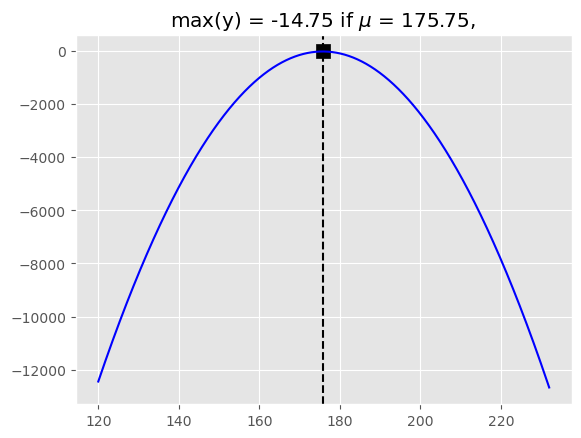

In [4]:
x = np.linspace(120,232,50000)
y = -((173-x)**2 +(177-x)**2+(175-x)**2+(178-x)**2)
max_idx = np.where(y == np.max(y))
print(x[max_idx])
plt.axvline(x[max_idx],color="black",linestyle="--")
plt.plot(x,y,"b")
plt.scatter(x[max_idx],y[max_idx],s=100,c="black",marker="s")
plt.title(f"max(y) = {round(np.max(y),3)} if $\mu$ = {round(x[max_idx][0],3)}, ")

가능도함수를 최대로 하는 모숫값은 175.75입니다. 따라서 MLE에 의한 모수에 대한 추정값은 175.75입니다.<br>
$$\hat{\theta}_{MLE} = 175.75$$

### **LL**

LL은 log likelyhood의 약자로 likelyhood에 log를 취해준 값입니다. 로그함수를 취해도 함수가 MLE의 계산결과(가능도가 최대인 모수에 대한 추정값)의 위치가 변하지 않고 계산을 곱셈을 더하기로 바꿔서 계산하기에 더 편리하기 때문에 LL을 사용할 수도 있습니다.<br>
$$LL = \text{ln }L(\theta|x_1,x_2 \dots,x_N)$$

### **NLL**

NLL은 LL에 -(negative)를 곱해준 값입니다. 함수가 최대인 지점을 찾는 문제를 최소인 지점을 찾는 문제로 바꿀 수 있습니다. 머신러닝이나 최적화에서 사용하는 방법입니다.
$$NLL = -\text{ln }L(\theta|x_1,X_2 = x_2 \dots x_N)$$

# <span style = "color : black">**정리**</span>
MLE를 통해서 모수에 대한 추정량을 구하면 다음과 같습니다.

\begin{aligned}
\hat{\theta}_{MLE} &= \underset{\theta}{\text{argmax}}\,L(\theta|x_1,x_2 \dots x_N)\\
&= \underset{\theta}{\text{argmax}},f_{X_1,X_2,\dots,X_n}(x_1,x_2,\dots,x_n|\theta) \\
&= \underset{\theta}{argmin}\,-\text{ln}\,L(\theta|x_1,x_2\dots x_N)
\end{aligned}

[링크1(random sample vs random variable)](https://stats.stackexchange.com/questions/239500/what-is-the-difference-between-random-variable-and-random-sample)<br>
[링크2(추정,추정량,추정값)](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=soohwan2-&logNo=100200023641)<br>
[링크3(mle)](https://angeloyeo.github.io/2020/07/17/MLE.html)<br>
[링크4(mle)](https://datascienceschool.net/02%20mathematics/09.02%20%EC%B5%9C%EB%8C%80%EA%B0%80%EB%8A%A5%EB%8F%84%20%EC%B6%94%EC%A0%95%EB%B2%95.html)